<a href="https://colab.research.google.com/github/insomehead/MMVSULAB/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

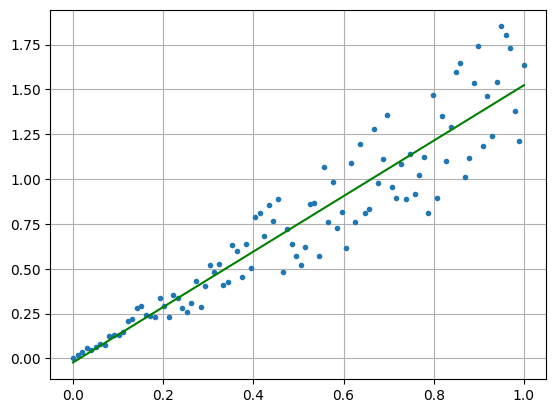

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

x = np.linspace(0,1,100)
y = x+x*np.random.random(len(x))
A = np.vstack([x,np.ones(len(x))]).T
a,b = np.linalg.lstsq(A,y,rcond=None)[0] 
plt.plot(x,y,'.')
plt.plot(x,x*a+b,'g')
plt.grid(True)
plt.show()

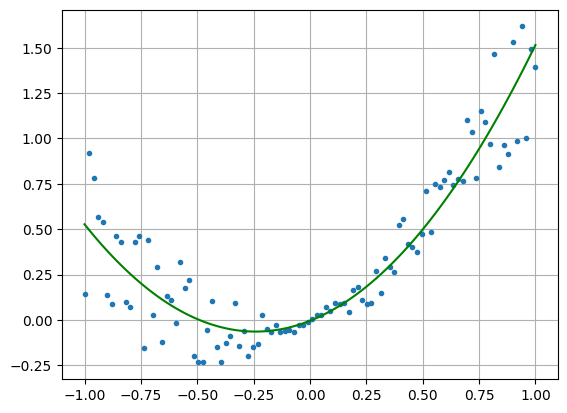

In [15]:
from scipy.optimize import curve_fit 
x = np.linspace(-1,1,100)
y = x**2+x*np.random.random(len(x))
def f(x,a,b,c):
  return a*x**2+b*x+c
(a,b,c),_=curve_fit(f,x,y) 
plt.plot(x,y,'.')
plt.plot(x,f(x,a,b,c),'g')
plt.grid(True)
plt.show()

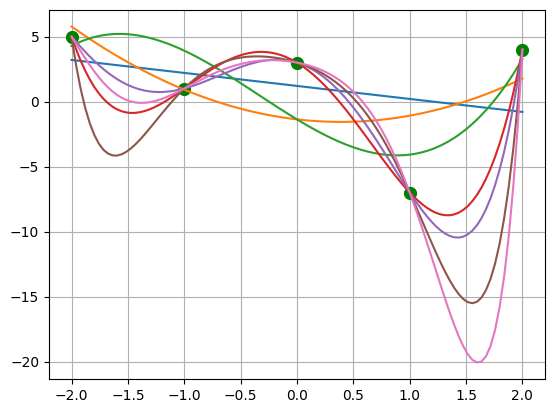

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

x = np.array([-2, -1, 0 , 1, 2])
y = np.array([5, 1, 3, -7, 4])
data = np.vstack([x,y]).T
x = x[:, np.newaxis]
x_long = np.linspace(-2, 2, 100)[:, np.newaxis]
model = make_pipeline(PolynomialFeatures(1), Ridge(alpha=1e-3))
model.fit(x,y)

y_predict = model.predict(x_long)

%matplotlib inline
plt.plot(x, y, 'g.', markersize=17)
for p in [1, 2, 3, 4, 5, 6, 7]:
  model = make_pipeline(PolynomialFeatures(p), Ridge(alpha=1e-3))
  model.fit(x,y)
  y_predict = model.predict(x_long)
  plt.plot(x_long, y_predict, label=str(p))

plt.grid(True)
plt.show()  